In [1]:
import os
import tarfile
import urllib.request


country_name_rus = {"Afganistan":'Афганистан',"China":'КНР',"CAR":'Центрально-Африканская Республика',
                    "Ethiopia":"Эфиопия ","India":'Индия', "Iran":'Иран',"KNDR":'КНДР', "Libya":'Ливия',
                    "Morocco":'Морокко', "Sudan":'Судан', "Syria":'Сирия', "Turkey":'Турция',
                    "Argentina":'Аргентина', "DRK_Congo":'ДРК (Конго)', "Burkina Faso":'Буркина-Фасо',
                    "Niger":'Нигер', "Mali":'Мали', "Senegal":'Сенегал', "Egipet":'Египет', "Gvineya":'Гвинея',
                    "Venesuela":'Венесуэла', "Algeria":'Алжир', "Zimbabve":'Зимбабве', "Tunis":'Тунис',
                    "Boliviya":'Боливия', "Braziliya":'Бразилия', "Yuar":'ЮАР', "Burundi":'Бурунди',
                    "Ruanda":'Руанда', "Mongoliya":'Монголия', "Respublika-koreya": 'Южная Корея',
                    "Chili": 'Чили',  'Bangladesh':'Бангладеш', 'Benin':'Бенин', 'Gabon':'Габон',
                    'Ekvatorialnaya-gviney':'Экваториальная Гвинея', 'Keniya':'Кения',
                    'Indoneziya':'Индонезия','Iordaniya':'Иордания', 'Irak':'Ирак',
                    'Kambodzha':'Камбоджа', 'Kuba':'Куба', 'Tailand':'Таиланд', 'Urugvay':'Уругвай',
                    'Kamerun':'Камерун', 'Madagaskar':'Мадагаскар', 'Mozambik':'Мозамбик', 'Chad':'Чад',
                    'Yaponiya':'Япония', 'Mexico': 'Мексика', 'Laos': 'Лаос', 'Pakistan': 'Пакистан', 
                    'Oae': 'ОАЭ', 'Saudovskaya_araviya': 'Саудовская Аравия','Yemen':'Йемен', 'RK_Congo':'Республика Конго'
                   }

CL =[ "Afganistan","China","CAR", "Ethiopia",
      "India", "Iran","KNDR", "Libya", "Morocco", "Sudan",
      "Syria", "Turkey", "Argentina", "DRK_Congo", "Burkina Faso",
      "Niger", "Mali", "Senegal", "Egipet", "Gvineya", "Venesuela",
      "Algeria", "Zimbabve", "Tunis", "Boliviya", "Braziliya",
      "Yuar", "Burundi", "Ruanda", "Mongoliya", 'Pakistan', 
     "Chili", 'Bangladesh', 'Benin', 'Gabon', 'Laos', 'Chad' , 
     'Keniya', 'Indoneziya','Iordaniya', 'Irak', 'Kambodzha', 'Kuba',
     'Tailand','Urugvay', 'Kamerun', 'Madagaskar', 'Mozambik', 'Yaponiya',
     'Mexico', 'Oae','Saudovskaya_araviya', 'Yemen', 'Pakistan', 'Laos', 'RK_Congo'
    ]

DIR_PATH= {}
DOWNLOAD_ROOT = "D:/ML/"
print(DOWNLOAD_ROOT)
#DATASET_PATH = os.path.join("datasets", "Countries")
DATASET_PATH = os.path.join("datasets", "Countries_V3")

for item in CL:
    DIR_PATH[country_name_rus[item]] = os.path.join(DATASET_PATH, item)
    
filenames = {}
for items in DIR_PATH.keys():   
    filenames[items] = [name for name in sorted(os.listdir(DIR_PATH[items])) ] 
    print(items)

D:/ML/
Афганистан
КНР
Центрально-Африканская Республика
Эфиопия 
Индия
Иран
КНДР
Ливия
Морокко
Судан
Сирия
Турция
Аргентина
ДРК (Конго)
Буркина-Фасо
Нигер
Мали
Сенегал
Египет
Гвинея
Венесуэла
Алжир
Зимбабве
Тунис
Боливия
Бразилия
ЮАР
Бурунди
Руанда
Монголия
Пакистан
Чили
Бангладеш
Бенин
Габон
Лаос
Чад
Кения
Индонезия
Иордания
Ирак
Камбоджа
Куба
Таиланд
Уругвай
Камерун
Мадагаскар
Мозамбик
Япония
Мексика
ОАЭ
Саудовская Аравия
Йемен
Республика Конго


In [30]:
stemming=True # Stemming control
if stemming:
    from nltk.stem.snowball import SnowballStemmer
    stemmer = SnowballStemmer("russian")

In [31]:
ru_stopwords = set(
        """
    а авось ага агу аж ай али алло ау ах ая
    б будем будет будете будешь буду будут будучи будь будьте бы был была были было
    быть бац без безусловно бишь благо благодаря ближайшие близко более больше
    будто бывает бывала бывали бываю бывают бытует
    в вам вами вас весь во вот все всё всего всей всем всём всеми всему всех всею
    всея всю вся вы ваш ваша ваше ваши вдали вдобавок вдруг ведь везде вернее
    взаимно взаправду видно вишь включая вместо внакладе вначале вне вниз внизу
    вновь вовсе возможно воистину вокруг вон вообще вопреки вперекор вплоть
    вполне вправду вправе впрочем впрямь вресноту вроде вряд всегда всюду
    всякий всякого всякой всячески вчеред
    г го где гораздо гав
    д да для до дабы давайте давно давным даже далее далеко дальше данная
    данного данное данной данном данному данные данный данных дану данунах
    даром де действительно довольно доколе доколь долго должен должна
    должно должны должный дополнительно другая другие другим другими
    других другое другой
    е его едим едят ее её ей ел ела ем ему емъ если ест есть ешь еще ещё ею едва
    ежели еле
    ж же
    з за затем зато зачем здесь значит зря
    и из или им ими имъ их ибо иль имеет имел имела имело именно иметь иначе
    иногда иным иными итак ишь
    й
    к как кем ко когда кого ком кому комья которая которого которое которой котором
    которому которою которую которые который которым которыми которых кто ка кабы
    каждая каждое каждые каждый кажется казалась казались казалось казался казаться
    какая какие каким какими каков какого какой какому какою касательно кой коли
    коль конечно короче кроме кстати ку куда
    л ли либо лишь любая любого любое любой любом любую любыми любых
    м меня мне мной мною мог моги могите могла могли могло могу могут мое моё моего
    моей моем моём моему моею можем может можете можешь мои мой моим моими моих
    мочь мою моя мы мало меж между менее меньше мимо многие много многого многое
    многом многому можно мол му
    н на нам нами нас наса наш наша наше нашего нашей нашем нашему нашею наши нашим
    нашими наших нашу не него нее неё ней нем нём нему нет нею ним ними них но
    наверняка наверху навряд навыворот над надо назад наиболее наизворот
    наизнанку наипаче накануне наконец наоборот наперед наперекор наподобие
    например напротив напрямую насилу настоящая настоящее настоящие настоящий
    насчет нате находиться начала начале неважно негде недавно недалеко незачем
    некем некогда некому некоторая некоторые некоторый некоторых некто некуда
    нельзя немногие немногим немного необходимо необходимости необходимые
    необходимым неоткуда непрерывно нередко несколько нету неужели нечего
    нечем нечему нечто нешто нибудь нигде ниже низко никак никакой никем
    никогда никого никому никто никуда ниоткуда нипочем ничего ничем ничему
    ничто ну нужная нужно нужного нужные нужный нужных ныне нынешнее нынешней
    нынешних нынче
    о об один одна одни одним одними одних одно одного одной одном одному одною
    одну он она оне они оно от оба общую обычно ого однажды однако ой около оный
    оп опять особенно особо особую особые откуда отнелижа отнелиже отовсюду
    отсюда оттого оттот оттуда отчего отчему ох очевидно очень ом
    п по при паче перед под подавно поди подобная подобно подобного подобные
    подобный подобным подобных поелику пожалуй пожалуйста позже поистине
    пока покамест поколе поколь покуда покудова помимо понеже поприще пор
    пора посему поскольку после посреди посредством потом потому потомушта
    похожем почему почти поэтому прежде притом причем про просто прочего
    прочее прочему прочими проще прям пусть
    р ради разве ранее рано раньше рядом
    с сам сама сами самим самими самих само самого самом самому саму свое своё
    своего своей своем своём своему своею свои свой своим своими своих свою своя
    себе себя собой собою самая самое самой самый самых сверх свыше се сего сей
    сейчас сие сих сквозь сколько скорее скоро следует слишком смогут сможет
    сначала снова со собственно совсем сперва спокону спустя сразу среди сродни
    стал стала стали стало стать суть сызнова
    та то ту ты ти так такая такие таким такими таких такого такое такой таком такому такою
    такую те тебе тебя тем теми тех тобой тобою того той только том томах тому
    тот тою также таки таков такова там твои твоим твоих твой твоя твоё
    теперь тогда тоже тотчас точно туда тут тьфу тая
    у уже увы уж ура ух ую
    ф фу
    х ха хе хорошо хотел хотела хотелось хотеть хоть хотя хочешь хочу хуже
    ч чего чем чём чему что чтобы часто чаще чей через чтоб чуть чхать чьим
    чьих чьё чё
    ш ша
    щ ща щас
    ы ых ые ый
    э эта эти этим этими этих это этого этой этом этому этот этою эту эдак эдакий
    эй эка экий этак этакий эх
    ю
    я явно явных яко якобы якоже
    
    и что не это  быть этот это свой как - этот весь быть что ▫ но г. % 
    
    afgbezparandzhi argentinarusa irandezhurniy info raspp аль privetfidel sex_drugs_kahlo full_text
    maslovasia china80s raspp_info prchand awaken_dragon asiatica_ru zangaro 
    africablack natasakado_official dnobangui africafordummies westernafrica meskob catcherinsudan africanists 
    syriaagency turk_gambit_ca shatergaddafi turkkulubu mideastr tangermanar marocrus arabstatesofgulf assadstash meastru strana_tuaregov 
    pqntc1 privetfidel altimurla favelasemrus pincheponchito laprimaveradelpatriarca lat_america tupireport venezuelanewsnetwork sputnikmundo 
    rt_russian infantmilitario IranPakistanAfganistan afgbezparandzhi DPRK_KNDR welcomeDPRK  irandezhurniy paxIranica 
    afgbezparandzhi Ethiopia_tezeta meskob india_tv2020 ninerasas indiareads speciallassi indiaanalytics Indosphere India_sangrahalaya 
    turkeyabout ShaterGaddafi tangermanar marocrus NovostiDamask dnobangui CatcherInSudan argentinarusa  Bras24 gdrusbf randentans novostimexico
    bengazi_exit

    
    """.split()
    )

In [32]:
from charset_normalizer import from_path
import string

def remove_chars_from_text(text, chars):
    # return "".join([ch for ch in text if ch not in chars])
    content = ''
    for ch in text:
        if ch not in chars:
            content = content + ''.join(ch)
        else:
            content = content + ''.join(' ')
    return content

import re

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, ' ', data)
spec_chars = string.punctuation + '\r' + '\n\xa0«»\t—…' 

x_temp = []
y_temp = []
for item in filenames.keys():
    post_temp=[]
    for names in filenames[item]:
        content = str(from_path(DIR_PATH[item]+"\\"+names).best()).lower()  
        content = remove_emojis(content)
        # content = re.sub(r'(\\u[0-9A-Fa-f]+)', lambda matchobj: chr(int(matchobj.group(0)[2:], 16)), content)
        content = remove_chars_from_text(content, spec_chars)
        content = remove_chars_from_text(content, string.digits)
        for i in range(1, 10):
            content = content.replace('  ', ' ')
        filtered_words = []
        for token in content.split():
            if token not in ru_stopwords and len(token)>2:
                if stemming and token is not None:
                    filtered_words.append(stemmer.stem(token))
                    #print('{} -{}'.format(token,stemmer.stem(token)))
                else:
                    filtered_words.append(token)
                      
        content = ' '.join(filtered_words)        
        x_temp.append(content)
        y_temp.append(item)

In [37]:
def corpus_ngram_replace (corpus, ng_count_target=7):
    # ng_count_target=7 минимальная частота в корпусе    
    
    from sklearn.feature_extraction.text import CountVectorizer
    
    count_ngram = CountVectorizer(ngram_range=(2,2))
    X_train_transformed_ngram = count_ngram.fit_transform(corpus)
    vocab = count_ngram.vocabulary_
    count_values = X_train_transformed_ngram.toarray().sum(axis=0)
    ng_text_feq =[]
    for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
        if ng_count>ng_count_target:
            #print(ng_count, ng_text)
            ng_text_feq.append(ng_text)
    print(len(ng_text_feq))
    corpus_with_ngram = []
    for text in x_temp:    
        for item in ng_text_feq:
            text = text.replace(item, item.replace(' ', '_'))        
        corpus_with_ngram.append(text)
    return corpus_with_ngram, vocab

In [39]:
ngram_replace = True # использование замены в тексте ngram

corpus = x_temp
if ngram_replace:
   corpus, vocabl  = corpus_ngram_replace (corpus)

21113


In [40]:
print(len(corpus))

14686


In [41]:
import numpy as np
from sklearn.model_selection import train_test_split


X = np.array(corpus, dtype=object)
y = np.array(y_temp)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

count = CountVectorizer(max_features=20000)
X_train_transformed = count.fit_transform(X_train)
#rf = DecisionTreeClassifier(max_depth=depth , min_samples_leaf=50)
rf = DecisionTreeClassifier()
rf.fit(X_train_transformed, y_train)

y_pred = rf.predict_proba(X_train_transformed)[:, 1]
score = cross_val_score(rf, X_train_transformed, y_train, cv=3, verbose=3)
print(score.mean())
print(cross_val_score(rf, X_train_transformed, y_train, scoring='accuracy'))
print(cross_val_score(rf, X_train_transformed, y_train, scoring='f1_macro'))    

[CV] END ................................ score: (test=0.798) total time=   2.5s
[CV] END ................................ score: (test=0.796) total time=   2.4s
[CV] END ................................ score: (test=0.809) total time=   2.6s
0.8008762302362573
[0.8098249  0.80107004 0.80496109 0.81031128 0.81614786]
[0.79346342 0.77568002 0.77666706 0.78532652 0.78843171]


In [43]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = count.transform(X_test)

rf.fit(X_test_transformed, y_test)

y_pred = rf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred, average='weighted')))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred, average='weighted')))

Precision: 99.29%
Recall: 99.27%


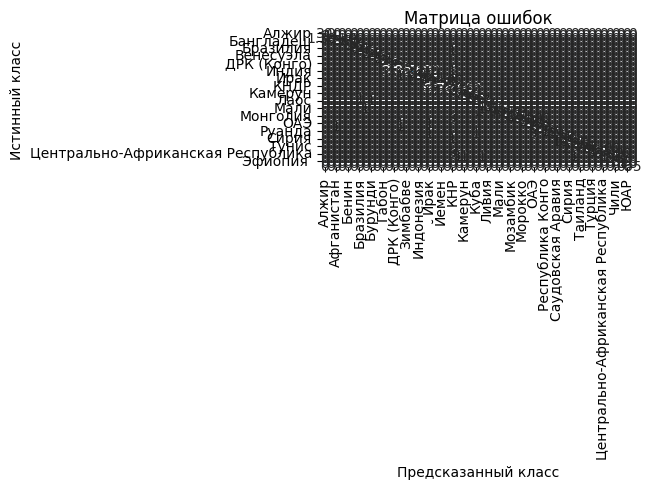

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns #pip install seaborn
from sklearn.metrics import confusion_matrix
import pandas as pd
# Создать матрицу ошибок
matrix = confusion_matrix(y_test, y_pred)
# Создать структуру DataFrame библиотеки pandas
dataframe = pd.DataFrame(matrix, index=rf.classes_, columns=rf.classes_)
# Создать тепловую карту
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Maтpицa ошибок")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

count = CountVectorizer(max_features=20000)
X_train_transformed = count.fit_transform(X_train)
#rf = DecisionTreeClassifier(max_depth=depth , min_samples_leaf=50)
rf_RandomForest = RandomForestClassifier(random_state=3, n_jobs=-1, class_weight="balanced")
rf_RandomForest.fit(X_train_transformed, y_train)

y_pred = rf_RandomForest.predict_proba(X_train_transformed)[:, 1]
score = cross_val_score(rf_RandomForest, X_train_transformed, y_train, cv=3, verbose=3)
print(score.mean())
print(cross_val_score(rf_RandomForest, X_train_transformed, y_train, scoring='accuracy'))
print(cross_val_score(rf_RandomForest, X_train_transformed, y_train, scoring='f1_macro'))    

[CV] END ................................ score: (test=0.860) total time=   1.8s
[CV] END ................................ score: (test=0.867) total time=   1.6s
[CV] END ................................ score: (test=0.869) total time=   1.7s
0.8653700258009706
[0.86770428 0.8672179  0.875      0.86916342 0.87986381]
[0.86217875 0.84953713 0.85506788 0.86165041 0.87743159]


In [46]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = count.transform(X_test)

rf_RandomForest.fit(X_test_transformed, y_test)

y_pred_RandomForest = rf_RandomForest.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_RandomForest, average='weighted')))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_RandomForest, average='weighted')))

Precision: 99.30%
Recall: 99.07%


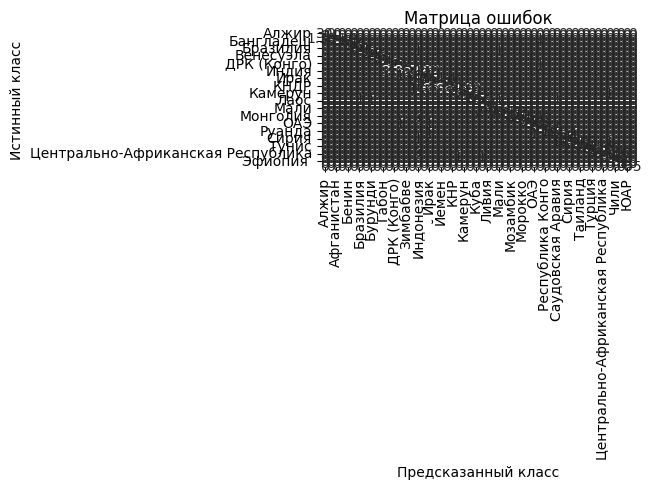

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns #pip install seaborn
from sklearn.metrics import confusion_matrix
import pandas as pd
# Создать матрицу ошибок
matrix = confusion_matrix(y_test, y_pred_RandomForest)
# Создать структуру DataFrame библиотеки pandas
dataframe = pd.DataFrame(matrix, index=rf_RandomForest.classes_, columns=rf_RandomForest.classes_)
# Создать тепловую карту
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Maтpицa ошибок")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

In [48]:
impoгtances = rf_RandomForest.feature_importances_
feature_imp_df = pd.DataFrame({'Word': count.get_feature_names_out(), 'Importance': impoгtances}).sort_values('Importance', ascending=False) 
print(feature_imp_df[:50])

                 Word  Importance
7813       мадагаскар    0.009260
19972            япон    0.009138
1896       буркин_фас    0.008948
1904           бурунд    0.008926
6499          камерун    0.008669
17770           тунис    0.008481
17827            турц    0.007894
19811           эфиоп    0.007853
6001              инд    0.007774
860             алжир    0.007477
5649          зимбабв    0.007298
7524             лаос    0.007218
3344            габон    0.007064
19125             чад    0.006989
1098         аргентин    0.006905
3411             гвин    0.006665
18967             цар    0.006596
6840             кндр    0.006456
1371        бангладеш    0.006314
17170         таиланд    0.006155
1803           бразил    0.006141
7407              куб    0.006112
7922           марокк    0.005973
8622         мозамбик    0.005943
19261             чил    0.005938
6493          камбодж    0.005802
6208              ира    0.005769
6666              кен    0.005442
14998         

In [63]:
with open('./telegram_Dataset/feature_importances_.txt', "w", encoding="utf-8") as some_file:
    some_file.write(feature_imp_df.to_string())

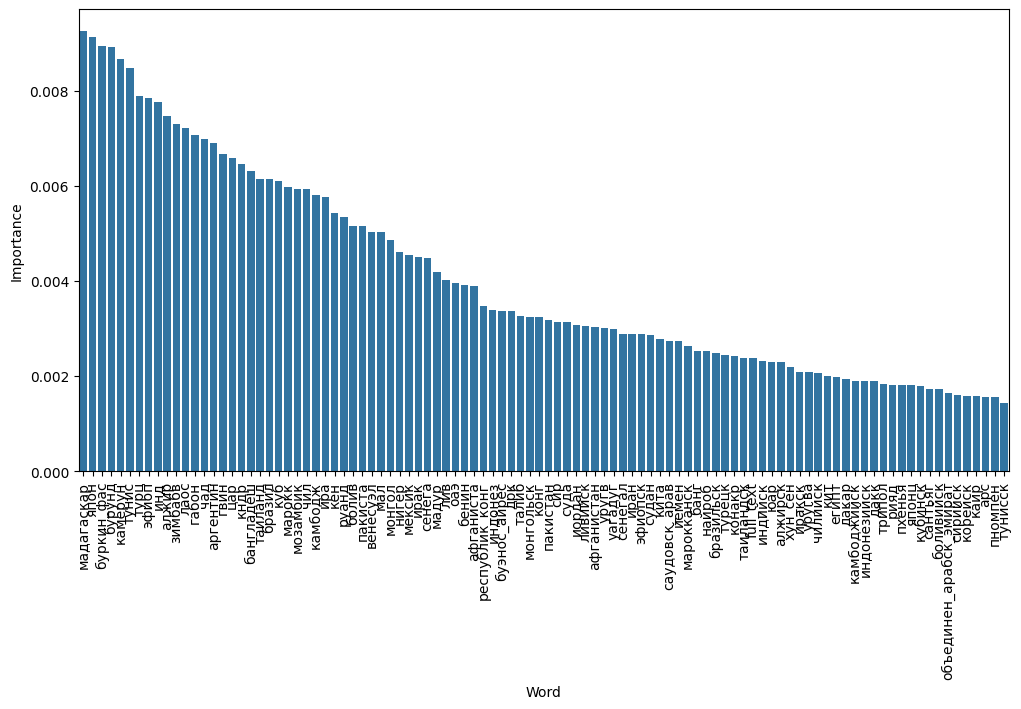

In [50]:
import pandas as pd
import seaborn as sns
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Word", y="Importance", data=feature_imp_df[:100])

ax.tick_params(axis='x', labelrotation=90)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


In [62]:
new_text = ['Нигер последовал примеру Мали, разорвав связи с Украиной после того, как пресс-секретарь разведывательного агентства Министерства обороны Украины признал, что Украина оказывала поддержку повстанцам, которые убили малийских вооруженных сил и российских агентов 25-27 июля в Тинзауатене, на севере Мали, недалеко от границы с Алжиром.Посол Украины в Сенегале также выразил безоговорочную поддержку малийским повстанцам, что привело к вызову посла в МИД Сенегала.',
            'Еще новости афганской промышленности. В Кандагаре спустя 18 лет возобновила работу текстильная фабрика. Официальные лица говорят, что они отремонтировали оборудование на фабрике за шесть месяцев, сообщают афганское СМИ. По словам работников фабрики, с возобновлением работы фабрики созданы рабочие места. 69-летний Мохаммад, проработавший на текстильной фабрике в Кандагаре значительное время, рад вернуться на работу.',
           'Накопленное непонимание между Китаем и США не может быть решено лишь одним подобным изящным жестом. Страны расходятся по широкому кругу вопросов, санкционный механизм против Китая не ослаблен. Поэтому отправка панд – это скорее демонстрация миролюбивой позиции Китая в противовес США.',
            'В Алжире, как правило, на похоронах мужчины сидят около дома, хорошо, если есть сад или терраса, а женщины в доме, надеть платок женщина должна обязательно, даже если в обычной жизни она не покрывает голову. Если покойный жил в квартире, то прямо во дворе ставят стулья и шатры со столами для мужчин.Готовят либо нанятые кухарки, либо родственницы покойного. Пока составляла пост от подруги услышала,что в их семье часто еду приносят те, кто приходит в дом, а готовить должны невестки, а не дочери умершего. Мой муж сказал, что это совершенно необязательно, на похоронах его бабушки готовили только её дочери, это было их желание и никаких особых правил на счёт этого нет. Обязательного блюда на поминки в Алжире нет. Народ приходит помянутьот трех дней до недели, если у человека была большая семья и много знакомых!Кормят традиционными блюдами: суп-шорба, кус-кус/беркукес/тлитли с мясом и т.д.Могилу посещают каждое утро, в течении трех дней. Через 40 дней устанавливают небольшое надгробие, никаких памятников,вычурных элементов. На надгробии имя, фамилия, даты рождения и смерти, фотографий нет. Вроде бы написала всё, что знала. Задавайте вопросы в комментариях, если таковые имеются.',
            'Сегодня в Венесуэле проходят президентские выборы. Мой коллега Дмитрий Морозов рассуждает, как их итоги могут повлиять на дальнейший путь страны. Вот самое важное из его статьи.📍В выборах один тур, участвуют десять кандидатов, однако только двое имеют реальные шансы на победу: действующий президент Николас Мадуро и Эдмундо Гонсалес Уррутия, кандидат от Единой демократической платформы, объединяющей наиболее значимые оппозиционные партии.'
           ]
x_temp = []
for post_temp in new_text:
        content = str(post_temp).lower()  
        content = remove_emojis(content)
        content = remove_chars_from_text(content, spec_chars)
        content = remove_chars_from_text(content, string.digits)
        for i in range(1, 10):
            content = content.replace('  ', ' ')
        filtered_words = []
        for token in content.split():
            if token not in ru_stopwords and len(token)>2:
                if stemming and token is not None:
                    filtered_words.append(stemmer.stem(token))
                    #print('{} -{}'.format(token,stemmer.stem(token)))
                else:
                    filtered_words.append(token)
                      
        content = ' '.join(filtered_words)  
        #if ngram_replace:
        #    for item in vocabl:
        #        if item.replace('_', ' ') in vocabl:
         #           content.replace(item.replace('_', ' '), item)
                    #print(item)                
        x_temp.append(content)
count = CountVectorizer(ngram_range=(1,2), vocabulary = set(count.get_feature_names_out()))
#count = CountVectorizer(vocabulary = set(X_train_words))
X_t = count.transform(x_temp)
print(count.vocabulary_)
accuracy = rf_RandomForest.predict(X_t)
print (accuracy)

{'abc': 0, 'acwa': 1, 'adani_group': 2, 'adnoc': 3, 'aerospace': 4, 'aes': 5, 'afp': 6, 'africa': 7, 'africom': 8, 'agence_france_presse': 9, 'agency': 10, 'air': 11, 'air_arabia': 12, 'air_india': 13, 'airbus': 14, 'airlines': 15, 'airways': 16, 'akp': 17, 'alg_today': 18, 'alibaba': 19, 'all_inclusive': 20, 'altay': 21, 'amazon': 22, 'amber': 23, 'ambrey': 24, 'america': 25, 'american': 26, 'amnesty': 27, 'anadolu': 28, 'and': 29, 'ane': 30, 'animaya': 31, 'apple': 32, 'arab': 33, 'arabicafrica': 34, 'arabiya': 35, 'arcelormittal': 36, 'art': 37, 'asharq': 38, 'asia': 39, 'asml': 40, 'aspides': 41, 'atr': 42, 'aukus': 43, 'auto': 44, 'awaken_dragon': 45, 'awards': 46, 'axios': 47, 'bank': 48, 'barclays': 49, 'baykar': 50, 'bayraktar': 51, 'bbc': 52, 'beidou': 53, 'beml': 54, 'bengazi_exit': 55, 'betterbrands': 56, 'bharat': 57, 'bienestar': 58, 'biocubafarma': 59, 'biontech': 60, 'black_hawk': 61, 'block': 62, 'bloomberg': 63, 'blu': 64, 'blue': 65, 'bmw': 66, 'boeing': 67, 'bowleven

In [64]:
probabilities = rf_RandomForest.predict_proba(X_t)
for i, prob in enumerate(rf_RandomForest.predict(X_t)):
    print(f"Sample {i}")
    for ix , probx in enumerate(rf_RandomForest.classes_):
        if probabilities[i][ix]>0.1:
            print(f" Class {probx}, Probability = {probabilities[i][ix]:.2f}")

Sample 0
 Class Алжир, Probability = 0.17
 Class Мали, Probability = 0.34
 Class Сенегал, Probability = 0.25
Sample 1
 Class Афганистан, Probability = 0.27
 Class КНР, Probability = 0.12
 Class Сирия, Probability = 0.15
Sample 2
 Class КНР, Probability = 0.95
Sample 3
 Class Алжир, Probability = 0.64
Sample 4
 Class Венесуэла, Probability = 0.89


In [ ]:
rf_RandomForest.classes_

In [54]:
import pickle
from datetime import datetime

time = datetime.now().strftime("%d-%m-%Y")

with open('contry_post-model_ngram_rf_RandomForest_V3_015_{}.bin'.format(time), 'wb') as f_out:
    pickle.dump([rf_RandomForest, count.get_feature_names_out()], f_out)